In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import model_from_json


_model = None


def load_modal():
    print("Loaading Model------------------")
    global _model
    model_path = "model.h5" 
    _model = tf.keras.models.load_model(model_path, custom_objects={'GlorotUniform': glorot_uniform()})
    print(_model.summary())
    print("Modal succefully running")

def preprocess_image(image):
    original_shape = image.shape
    resized_img = cv2.resize(image, (500, 500))
    formatted_img = np.expand_dims(resized_img, axis=0)
    return original_shape, formatted_img

def get_prediction(image):
    global _model
    if _model == None:
        load_modal()
    prediction = _model.predict(image)
    predicted_img = prediction[0]
    return predicted_img

def post_process_image(predicted_img, original_shape):
    original_size_img = cv2.resize(predicted_img, (original_shape[1], original_shape[0]))
    rgb_img = cv2.cvtColor(original_size_img.astype(np.uint8), cv2.COLOR_BGR2RGB)
    return rgb_img

def convert_image(image):
    shape,image = preprocess_image(image)
    prediction = get_prediction(image)
    rgb_img = post_process_image(prediction, shape)
    return rgb_img

2024-08-19 20:41:10.335988: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 20:41:10.455920: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 20:41:10.603633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 20:41:10.726330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 20:41:10.772158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 20:41:10.982102: I tensorflow/core/platform/cpu_feature_gu

In [5]:
img = cv2.imread("IMG_20240810_121158.jpg")
img.shape

(3320, 3050, 3)

In [6]:
shape,img = preprocess_image(img)
shape, img.shape

((3320, 3050, 3), (1, 500, 500, 3))

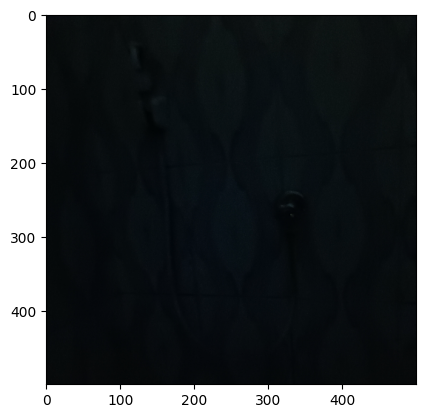

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img[0])